In [10]:
import graph_tool.all as gt

In [11]:
g = gt.collection.data['football']
g

<Graph object, undirected, with 115 vertices and 613 edges at 0x7f9125bf5358>

In [15]:
state = gt.minimize_blockmodel_dl(g, overlap=True)

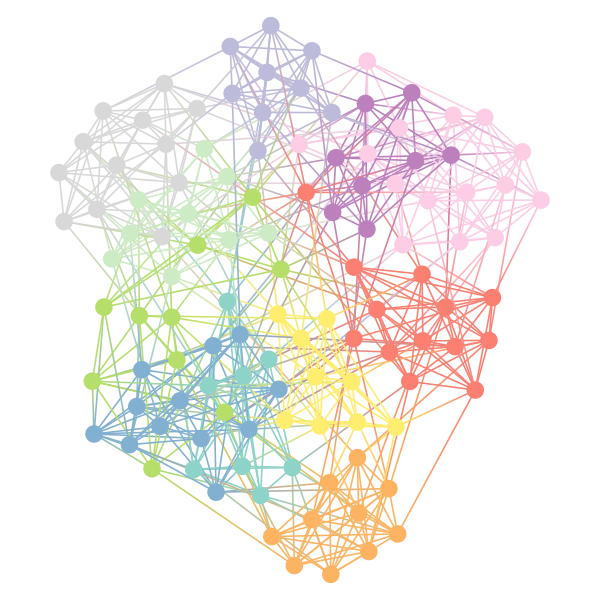

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f9125bf5358, at 0x7f910fc10208>

In [16]:
state.draw()

In [ ]:
gt.mcmc_equilibrate(state, wait=1000, mcmc_args=dict(niter=10))

(1795.594152554479, 24520000, 11229807)

In [ ]:
pv = None

def collect_marginals(s):
   global pv
   pv = s.collect_vertex_marginals(pv)

# Now we collect the marginals for exactly 100,000 sweeps, at
# intervals of 10 sweeps:
gt.mcmc_equilibrate(state, force_niter=10000, mcmc_args=dict(niter=10),
                    callback=collect_marginals)

# Now the node marginals are stored in property map pv. We can
# visualize them as pie charts on the nodes:
state.draw(pos=g.vp.pos, vertex_shape="pie", vertex_pie_fractions=pv,
           edge_gradient=None, output="lesmis-sbm-marginals.svg")

In [ ]:
pv